# Analysing Reliability of DOSPERT answers 20 LLMs

- We want to measure, for each LLM, how consistent it is in assigning probabilities across the 40-item answer patterns of a single human. Essentially: “Does the LLM consistently see the human’s answer pattern as more or less probable, or is it erratic?”

In [18]:
# packages
import pandas as pd
import numpy as np
import glob
import os
import matplotlib.pyplot as plt

# Initialize empty list to store DataFrames
dospert_dataframes = []

path = "outputs"  # folder with CSVs

for file in glob.glob(os.path.join(path, "*_dospert_scores.csv")):
    model_name = os.path.basename(file).replace("_dospert_scores.csv", "")
    
    # Read the CSV
    df = pd.read_csv(file)
    
    # Append to list
    dospert_dataframes.append(df)
    
# Concatenate all DataFrames into one big DataFrame
merged_dospert_data = pd.concat(dospert_dataframes, ignore_index=True)

print(f"\nMerged DataFrame shape: {merged_dospert_data.shape}")
print(f"Total models: {merged_dospert_data['model'].nunique()}")
print(f"Models included: {sorted(merged_dospert_data['model'].unique())}")

# Check column names
print(f"\nColumns: {list(merged_dospert_data.columns)}")

# add column with predicted logprob for actual human answers
merged_dospert_data['logprob_predicted'] = merged_dospert_data.apply(
    lambda row: row[str(row['human_number'])], axis=1
)



Merged DataFrame shape: (1208800, 11)
Total models: 20
Models included: ['Falcon-3-10B-Instruct', 'Falcon-3-1B-Instruct', 'Falcon-3-7B-Instruct', 'Llama-3.1-8B-Instruct', 'Llama-3.2-1B-Instruct', 'Llama-3.2-3B-Instruct', 'Ministral-8B-Instruct-2410', 'Mistral-7B-Instruct-v0.3', 'OLMo-2-7B-Instruct', 'Qwen3-1.7B', 'Qwen3-4B', 'Qwen3-8B', 'SmolLM-1.7B-Instruct', 'SmolLM2-1.7B-Instruct', 'Unsloth-Qwen3-1.7B', 'gemma-2-2b-it', 'gemma-2-9b-it', 'gemma-3-1b-it', 'gemma-3-4b-it', 'zephyr-7b-beta']

Columns: ['human_number', '1', '2', '3', '4', '5', 'model', 'item', 'participant', 'flipped', 'experiment']


In [19]:
merged_dospert_data

,human_number,1,2,3,4,5,model,item,participant,flipped,experiment,logprob_predicted
0,4,-7.56250,-7.56250,-7.56250,-7.56250,-7.56250,Mistral-7B-Instruct-v0.3,1,64000401,no,DOSPERT scale,-7.56250
1,5,-10.62500,-10.62500,-10.62500,-10.62500,-10.62500,Mistral-7B-Instruct-v0.3,2,64000401,no,DOSPERT scale,-10.62500
2,1,-11.81250,-11.81250,-11.81250,-11.81250,-11.81250,Mistral-7B-Instruct-v0.3,3,64000401,no,DOSPERT scale,-11.81250
3,5,-6.71875,-6.71875,-6.71875,-6.71875,-6.71875,Mistral-7B-Instruct-v0.3,4,64000401,no,DOSPERT scale,-6.71875
4,3,-8.31250,-8.31250,-8.31250,-8.31250,-8.31250,Mistral-7B-Instruct-v0.3,5,64000401,no,DOSPERT scale,-8.31250
...,...,...,...,...,...,...,...,...,...,...,...,...
1208795,2,-21.87500,-22.87500,-21.75000,-21.50000,-20.62500,OLMo-2-7B-Instruct,36,68051401,yes,DOSPERT scale,-22.87500
1208796,3,-22.25000,-23.12500,-22.37500,-21.00000,-20.62500,OLMo-2-7B-Instruct,37,68051401,yes,DOSPERT scale,-22.37500
1208797,1,-20.25000,-21.12500,-20.62500,-20.37500,-19.62500,OLMo-2-7B-Instruct,38,68051401,yes,DOSPERT scale,-20.25000
1208798,3,-21.25000,-22.75000,-22.12500,-20.62500,-20.50000,OLMo-2-7B-Instruct,39,68051401,yes,DOSPERT scale,-22.12500


In [20]:
# merged_dospert_data: long format with columns ['participant', 'item', 'model', 'logprob_predicted']

df_wide = merged_dospert_data.pivot_table(
    index=['model', 'participant'],
    columns='item',
    values='logprob_predicted'
).reset_index()

# Now you have a DataFrame:
# columns = ['model', 'participant', item1, item2, ..., item40]

df_wide


item,model,participant,1,2,3,4,5,6,7,8,...,31,32,33,34,35,36,37,38,39,40
0,Falcon-3-10B-Instruct,64000401,-19.75000,-16.8750,-20.375,-7.7500,-15.00000,-15.00000,-9.50000,-12.0000,...,-17.6250,-15.6875,-15.5625,-17.2500,-16.5000,-16.50000,-17.7500,-15.9375,-13.0625,-16.2500
1,Falcon-3-10B-Instruct,64004701,-17.37500,-14.7500,-18.750,-8.1250,-14.43750,-17.75000,-13.62500,-17.0000,...,-13.9375,-13.6875,-15.1875,-13.6250,-14.5000,-16.75000,-17.1250,-17.0000,-14.5000,-14.3125
2,Falcon-3-10B-Instruct,64006401,-17.37500,-21.6250,-20.875,-8.2500,-10.18750,-17.75000,-11.68750,-13.6250,...,-15.6875,-15.1250,-15.1250,-14.0625,-16.1250,-15.81250,-15.8125,-14.6250,-14.8750,-12.8750
3,Falcon-3-10B-Instruct,64006901,-17.37500,-21.6250,-20.875,-17.2500,-19.50000,-19.75000,-14.87500,-17.3750,...,-19.5000,-17.1250,-16.1250,-20.2500,-18.2500,-15.31250,-16.6250,-18.5000,-19.0000,-16.7500
4,Falcon-3-10B-Instruct,64007901,-23.37500,-15.1875,-19.125,-17.2500,-22.00000,-17.62500,-20.62500,-20.2500,...,-16.2500,-14.8125,-16.5000,-18.0000,-16.2500,-16.50000,-17.8750,-18.1250,-16.1250,-17.3750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30135,zephyr-7b-beta,68050801,-9.87500,-8.8750,-10.500,-6.3750,-9.12500,-10.50000,-7.25000,-7.5625,...,-10.3750,-11.0625,-11.1875,-11.1250,-11.1250,-10.87500,-11.0625,-10.8125,-10.5625,-10.1250
30136,zephyr-7b-beta,68050901,-4.62500,-8.9375,-10.250,-7.3125,-10.12500,-7.03125,-6.93750,-6.4375,...,-11.0625,-11.0625,-11.3125,-10.9375,-11.0000,-11.06250,-11.8125,-10.7500,-10.2500,-9.5000
30137,zephyr-7b-beta,68051101,-3.71875,-8.5000,-10.250,-10.5625,-5.96875,-10.93750,-8.12500,-9.3750,...,-10.1875,-11.0625,-11.5625,-11.6875,-10.8750,-9.06250,-11.2500,-10.4375,-8.8750,-8.2500
30138,zephyr-7b-beta,68051301,-4.62500,-7.7500,-10.875,-11.6250,-9.50000,-11.06250,-6.84375,-10.2500,...,-9.1250,-10.2500,-11.1875,-11.3125,-11.0625,-7.34375,-9.6250,-9.7500,-10.3125,-10.0625


In [21]:
# ---- Cronbach's alpha ----
def cronbach_alpha(df):
    k = df.shape[1]
    item_vars = df.var(axis=0, ddof=1)
    total_var = df.sum(axis=1).var(ddof=1)
    return (k / (k - 1)) * (1 - item_vars.sum() / total_var)



alphas = {}
for m, sub in df_wide.groupby("model"):
    scores = sub.drop(columns=["model", "participant"])
    alpha = cronbach_alpha(scores)
    print(f"Model {m}: alpha = {alpha:.3f}")
    alphas[m] = alpha

Model Falcon-3-10B-Instruct: alpha = 0.878
Model Falcon-3-1B-Instruct: alpha = 0.890
Model Falcon-3-7B-Instruct: alpha = 0.821
Model Llama-3.1-8B-Instruct: alpha = 0.845
Model Llama-3.2-1B-Instruct: alpha = 0.879
Model Llama-3.2-3B-Instruct: alpha = 0.846
Model Ministral-8B-Instruct-2410: alpha = 0.823
Model Mistral-7B-Instruct-v0.3: alpha = 0.509
Model OLMo-2-7B-Instruct: alpha = 0.728
Model Qwen3-1.7B: alpha = 0.806
Model Qwen3-4B: alpha = 0.961
Model Qwen3-8B: alpha = 0.937
Model SmolLM-1.7B-Instruct: alpha = 0.891
Model SmolLM2-1.7B-Instruct: alpha = 0.905
Model Unsloth-Qwen3-1.7B: alpha = 0.806
Model gemma-2-2b-it: alpha = 0.890
Model gemma-2-9b-it: alpha = 0.843
Model gemma-3-1b-it: alpha = 0.855
Model gemma-3-4b-it: alpha = 0.873
Model zephyr-7b-beta: alpha = 0.480


In [22]:
alpha_df = pd.DataFrame(list(alphas.items()), columns=["model_id", "alpha"])
alpha_df

,model_id,alpha
0,Falcon-3-10B-Instruct,0.878190
1,Falcon-3-1B-Instruct,0.889917
2,Falcon-3-7B-Instruct,0.820712
3,Llama-3.1-8B-Instruct,0.844969
4,Llama-3.2-1B-Instruct,0.879203
5,Llama-3.2-3B-Instruct,0.845968
6,Ministral-8B-Instruct-2410,0.822769
7,Mistral-7B-Instruct-v0.3,0.508602
8,OLMo-2-7B-Instruct,0.727708
9,Qwen3-1.7B,0.806170


/var/folders/g6/6tx7kz_51_92m63qx0q2c2lw0000gn/T/ipykernel_67078/3137863220.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


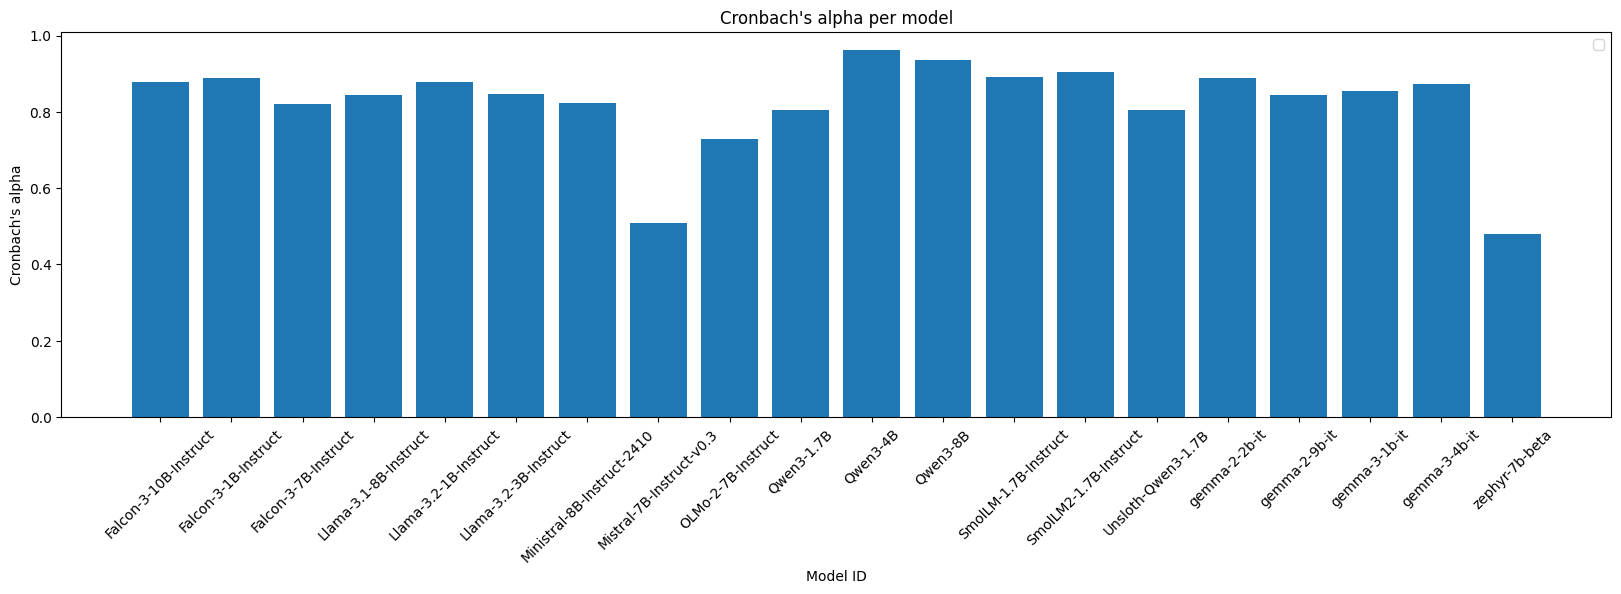

In [25]:
plt.figure(figsize=(20,5))
plt.bar(alpha_df["model_id"].astype(str), alpha_df["alpha"])
#plt.axhline(0.7, color="red", linestyle="--", label="Threshold .70")
plt.ylabel("Cronbach's alpha")
plt.xlabel("Model ID")
plt.xticks(rotation=45) 
plt.title("Cronbach's alpha per model")
plt.legend()
plt.show()